<a href="https://colab.research.google.com/github/YaelLopezS/Inteligencia-artificial-avanzada-para-la-ciencia-de-datos/blob/main/Churn_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Extract

Cargamos el dataset

In [30]:
df_telco = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Visualizamos el dataframe

In [31]:
print("Tamaño del Dataframe:")
print(df_telco.shape)

print("\nPrevisualizacion del Dataframe:")
display(df_telco.head(5))

Tamaño del Dataframe:
(7043, 21)

Previsualizacion del Dataframe:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Buscamos los valores nulos

In [32]:
df_telco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [33]:
#Visualizamps las estadisticas de cada columna
df_telco.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [34]:
# Vemos el tipo de cada columna
df_telco.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [35]:
#Visualizamos duplicados
df_telco.duplicated().sum()

np.int64(0)

#Transform

Primero pasamos la columna de TotalCharge para que sea de tipo numerica

In [36]:
# Vamos a ver que valores no son de tipo numerico en esta columna, ya sea porque es un caracter, un espacio, string, etc.
df_telco[df_telco['TotalCharges'].str.strip() == '']

# Reemplazamos estos valores que no son numericos por un valores nulos (NAN) y convertimos el resto ahora si de tipo numerico
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')


In [37]:
# Vamos a imputar los valores nulos restantes con la media
mean_total_charges = df_telco['TotalCharges'].mean()
df_telco['TotalCharges'].fillna(mean_total_charges, inplace=True)

/tmp/ipython-input-1146738978.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telco['TotalCharges'].fillna(mean_total_charges, inplace=True)


Vamos a hacer codificacion binaria, es decir, todos los valores categoricos como Yes, No, Male, Female, etc. Los vamos a reemplazar por 0 y 1

Y para las columnas con multiples categorias vamos a utilizar one-hot

In [38]:
# Codificacion binaria para las columnas que se pueden intercambiar por ceros y unos
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_telco[binary_cols] = df_telco[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

/tmp/ipython-input-694603040.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telco[binary_cols] = df_telco[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [39]:
# Codificacion one-hot para las columnas que tienen muchas categorias y no solo dos
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

df_telco = pd.get_dummies(df_telco, columns=multi_cat_cols, drop_first=True)

# 1. General Customer Profile

Calculate the descriptive statistics for the tenure, MonthlyCharges, and TotalCharges
columns.

In [40]:
# Estadísticas descriptivas de tenure, MonthlyCharges y TotalCharges
df_telco[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


**By comparing the mean and median of tenure, how would you describe the
company's "typical" customer?**

Bueno para recapitular la media nos dio un total de 32.37 meses, pero la mediana nos da un total de 29 meses. Osea que el promedio de los clientes de esta empresa ha estado aqui mas tiempo que los clientes que entraron despues ya que estos tienen una duracion de 29 meses, una diferencia de aproximadamente 4 meses, como la mediana es el resultado de acomodar de forma ascendente o descendente la duracion de nuestros clientes, podemos intuir que la mayoria de estos clienets evaluados son recientes, pero existe un conjunto de clientes fieles que han estado mas meses en la empresa

# 2. Distribution Visualization

Generate histograms for the tenure and MonthlyCharges columns.

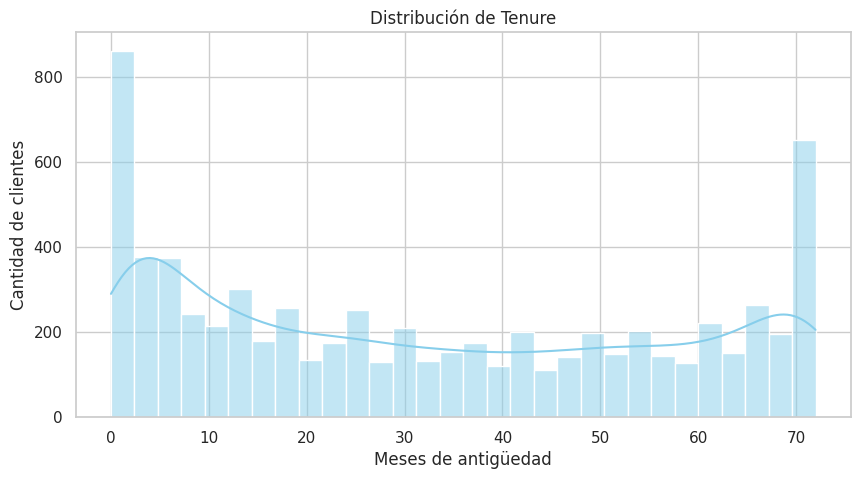

In [41]:
# Histograma de tenure
plt.figure(figsize=(10, 5))
sns.histplot(df_telco['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Tenure')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Cantidad de clientes')
plt.show()

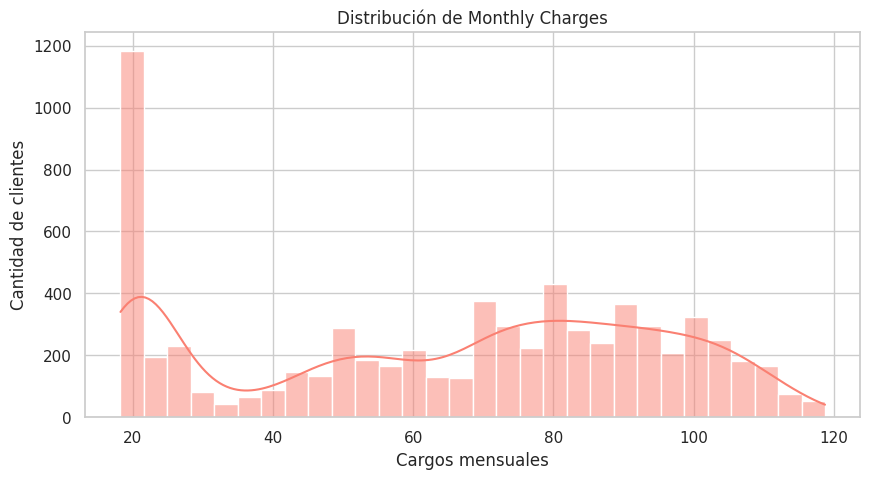

In [42]:
# Histograma de MonthlyCharges
plt.figure(figsize=(10, 5))
sns.histplot(df_telco['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribución de Monthly Charges')
plt.xlabel('Cargos mensuales')
plt.ylabel('Cantidad de clientes')
plt.show()

**Describe the shape of each distribution. Are they symmetric, skewed? What interesting patterns or peaks do you observe?**

Las distribuciones no son simetricas del todo ya que por ejemplo en ambas si es como que al principio tiene su pico y despues va decayendo, pero la distribicion de cargos tiene un ligero aumento en el rango de 70-100 y en la de tenure no. En la grafica de tenure vemos que hay una gran cantidad de clientes nuevos (entre 0-10 meses) pero asi mismo una gran cantidad de clientes fieles (al llegar a 70 porque hay un ligero aumento) es por eso que suceden esos picos pero de ahi en ese lapso de tiempo entre estos dos se mantienen un poco constantes, algunas bajas y algunas altas. Y en la de los cargos se ve que hay una gran cantidad de personas que prefieren los contratos/promociones/servicios baratos con cobros entre 20-40 pero asi tambien hay un grupo algo chico que prefiere esas promociones que a pesar de ser caras les conviene a ellos y no se molestan por pagar entre 70-100. Por lo que podemos ver es que hay dos grupos muy destacables en estas graficas y son:



*   Un grupo de personas nuevas/recientes que prefieren las promociones que no son muy costosas pero les benefician por una u otra razon
*   Y las personas fidelizadas que llevan mucho tiempo y pagan una promocion mas cara pero que les conviene segun sus necesidades

# 3. Segment Analysis (Churn vs No Churn)

Group the data by the Churn column and calculate the median for tenure and
MonthlyCharges for each group.

In [43]:
# Agrupamos por Churn y calculamos la mediana de tenure y MonthlyCharges
median_values = df_telco.groupby('Churn')[['tenure', 'MonthlyCharges']].median()
print(median_values)

       tenure  MonthlyCharges
Churn                        
0        38.0          64.425
1        10.0          79.650


**What key differences do you notice?**

Podemos ver que los clientes fieles tienen una mediana de 38 meses de antiguedad y pagan en promedio 64.42, mientras que los que se van solo llevan 10 meses y pagan mas que los clienets fieles, como 79.65. Osea que los que hacen churn son mas nuevos y estan pagando mas desde el inicio, por lo que al ser nuevos y pagar mucho dinero, bueno, al menos mas que el promedio de los clientes fieles puede ser una razon para que se vayan antes. Por otro lado, los que ya llevan tiempo (los clientes fidelizados) tienen cargos mas bajos y probablemente estan mas comodos con lo que les ofrecen.

Create a box plot that compares the distribution of MonthlyCharges between customers who churned (Churn='Yes') and those who did not (Churn='No').

/tmp/ipython-input-1939391676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telco, x='Churn', y='MonthlyCharges', palette='Set2')


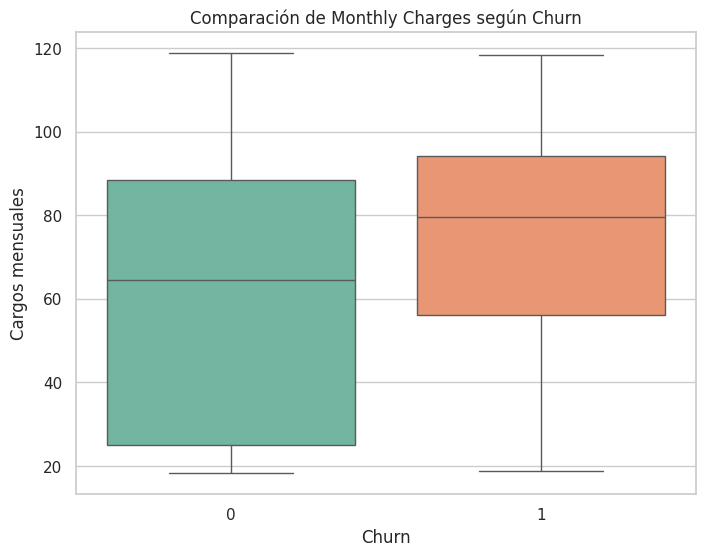

In [44]:
# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_telco, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Comparación de Monthly Charges según Churn')
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()

**What insight does the chart give you?**

Bueno podemos observar que los clientes que hacen churn tienen cargos mensuales mas altos que los que se quedan. La caja de los que se van esta mas arriba y su mediana es mayor, osea que en general pagan mas. Esto puede indicar que los clientes que pagan mucho desde el inicio no siempre se sienten conformes y por eso se van. En cambio, los que pagan menos parecen estar mas estables y se quedan por mas tiempo.